In [16]:
from google.colab import userdata

# Secret 이름으로 가져오기
token = userdata.get('GITHUB_TOKEN')

# 클론
!git clone https://{token}@github.com/iamcmj/group5_project.git

# 폴더 확인
!ls -la group5_project/

Cloning into 'group5_project'...
remote: Enumerating objects: 211, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 211 (delta 12), reused 28 (delta 3), pack-reused 168 (from 1)
Receiving objects: 100% (211/211), 49.54 MiB | 25.84 MiB/s, done.
Resolving deltas: 100% (27/27), done.
total 40
drwxr-xr-x 8 root root 4096 Nov  2 10:16 .
drwxr-xr-x 1 root root 4096 Nov  2 10:16 ..
drwxr-xr-x 3 root root 4096 Nov  2 10:16 blip
drwxr-xr-x 2 root root 4096 Nov  2 10:16 clip
drwxr-xr-x 8 root root 4096 Nov  2 10:16 .git
-rw-r--r-- 1 root root   17 Nov  2 10:16 .gitignore
drwxr-xr-x 2 root root 4096 Nov  2 10:16 inference
drwxr-xr-x 2 root root 4096 Nov  2 10:16 metadata
drwxr-xr-x 8 root root 4096 Nov  2 10:16 pytorch-template
-rw-r--r-- 1 root root  128 Nov  2 10:16 README.md


In [18]:
import os
from glob import glob

# blip 폴더 구조 확인
print("=== blip 폴더 구조 ===")
!ls -la group5_project/blip/

# data 폴더 찾기
print("\n=== data 폴더 찾기 ===")
!find group5_project/blip -type d -name "data"

# 또는 전체 구조 확인
print("\n=== 전체 구조 (3단계까지) ===")
!find group5_project/blip -type d | head -20

=== blip 폴더 구조 ===
total 32700
drwxr-xr-x 3 root root     4096 Nov  2 10:16 .
drwxr-xr-x 8 root root     4096 Nov  2 10:16 ..
-rw-r--r-- 1 root root    56206 Nov  2 10:16 BLIP_CODE.ipynb
-rw-r--r-- 1 root root 33404315 Nov  2 10:16 BLIP.ipynb
-rw-r--r-- 1 root root     7623 Nov  2 10:16 BLIP.md
drwxr-xr-x 8 root root     4096 Nov  2 10:16 data

=== data 폴더 찾기 ===
group5_project/blip/data

=== 전체 구조 (3단계까지) ===
group5_project/blip
group5_project/blip/data
group5_project/blip/data/지혜의숲 조각상
group5_project/blip/data/지혜의 숲
group5_project/blip/data/활판 공방
group5_project/blip/data/웅진역사관
group5_project/blip/data/피노키오
group5_project/blip/data/네모탑


✅ 총 4개의 이미지 파일 발견
처음 5개 파일: ['14053057093432.jpg', '69283d44-9a4f-4c65-8826-f82cfa964d6c.jpg', '14053057093281.jpg', '7dcde12a-228d-4973-ac86-82928316e2b7.jpg']


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


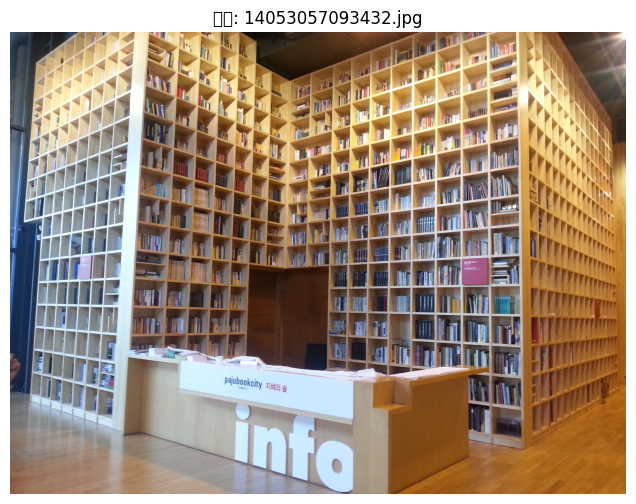

이미지 크기: (3264, 2448)


In [30]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# 이미지 폴더 경로 (실제 경로에 맞게 수정)
image_folder = 'group5_project/blip/data/지혜의 숲'

# 폴더가 존재하는지 확인
if os.path.exists(image_folder):
    # 이미지 파일만 필터링
    image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.webp')
    image_files = [f for f in os.listdir(image_folder)
                   if f.lower().endswith(image_extensions)]

    print(f"✅ 총 {len(image_files)}개의 이미지 파일 발견")
    print(f"처음 5개 파일: {image_files[:5]}")

    # 첫 번째 이미지 표시
    if image_files:
        first_image = os.path.join(image_folder, image_files[0])
        img = Image.open(first_image)
        plt.figure(figsize=(8, 6))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"예시: {image_files[0]}")
        plt.show()
        print(f"이미지 크기: {img.size}")
else:
    print(f"❌ 폴더를 찾을 수 없습니다: {image_folder}")
    print("\n사용 가능한 폴더들:")
    !ls -R group5_project/blip/

 # 영어 + 한국어 설명 병행

In [31]:
!pip install transformers torch pillow -q

from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import torch

# 기본 CLIP 모델 (한국어도 어느 정도 이해함)
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# 이미지 로드
image = Image.open("group5_project/blip/data/지혜의 숲/14053057093432.jpg")

In [32]:
# 한국어 레이블
korean_labels = [
    "밝고 화사한 분위기",
    "어둡고 우울한 분위기",
    "따뜻하고 포근한 느낌",
    "차갑고 쓸쓸한 느낌",
    "활기차고 생동감 있는",
    "고요하고 평화로운",
    "낭만적이고 몽환적인",
    "신비롭고 비밀스러운"
]

inputs = processor(text=korean_labels, images=image, return_tensors="pt", padding=True)

# 추론
with torch.no_grad():
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image
    probs = logits_per_image.softmax(dim=1)

# 결과 출력
print("=== 한국어 감성 분류 결과 ===\n")
for label, prob in zip(korean_labels, probs[0]):
    bar = "█" * int(prob.item() * 50)
    print(f"{label:25s}: {prob.item()*100:5.2f}% {bar}")

# Top 3
print("\n🎯 Top 3 분위기:")
top3_idx = probs[0].argsort(descending=True)[:3]
for i, idx in enumerate(top3_idx, 1):
    print(f"{i}. {korean_labels[idx]}: {probs[0][idx]*100:.2f}%")

=== 한국어 감성 분류 결과 ===

밝고 화사한 분위기               : 18.55% █████████
어둡고 우울한 분위기              : 11.75% █████
따뜻하고 포근한 느낌              : 12.64% ██████
차갑고 쓸쓸한 느낌               :  3.04% █
활기차고 생동감 있는              :  7.29% ███
고요하고 평화로운                :  6.51% ███
낭만적이고 몽환적인               : 37.17% ██████████████████
신비롭고 비밀스러운               :  3.06% █

🎯 Top 3 분위기:
1. 낭만적이고 몽환적인: 37.17%
2. 밝고 화사한 분위기: 18.55%
3. 따뜻하고 포근한 느낌: 12.64%


In [36]:
# 영어 + 한국어 설명 병행 (성능 향상)
bilingual_labels = [
    "bright and cheerful atmosphere, 밝고 화사한 분위기",
    "dark and moody atmosphere, 어둡고 우울한 분위기",
    "warm and cozy feeling, 따뜻하고 포근한 느낌",
    "cold and lonely feeling, 차갑고 쓸쓸한 느낌",
    "vibrant and energetic, 활기차고 생동감 있는",
    "calm and peaceful, 고요하고 평화로운",
    "romantic and dreamy, 낭만적이고 몽환적인",
    "mysterious and enigmatic, 신비롭고 비밀스러운"
]

inputs = processor(text=bilingual_labels, images=image, return_tensors="pt", padding=True)
outputs = model(**inputs)
probs = outputs.logits_per_image.softmax(dim=1)

for label, prob in zip(bilingual_labels, probs[0]):
    # 한국어 부분만 추출
    korean_part = label.split(", ")[1]
    print(f"{korean_part:25s}: {prob.item()*100:.2f}%")

# Top 3
print("\n🎯 Top 3 분위기:")
top3_idx = probs[0].argsort(descending=True)[:3]
for i, idx in enumerate(top3_idx, 1):
    print(f"{i}. {korean_labels[idx]}: {probs[0][idx]*100:.2f}%")

밝고 화사한 분위기               : 81.08%
어둡고 우울한 분위기              : 0.02%
따뜻하고 포근한 느낌              : 5.96%
차갑고 쓸쓸한 느낌               : 0.04%
활기차고 생동감 있는              : 0.49%
고요하고 평화로운                : 6.29%
낭만적이고 몽환적인               : 5.44%
신비롭고 비밀스러운               : 0.69%

🎯 Top 3 분위기:
1. 밝고 화사한 분위기: 81.08%
2. 고요하고 평화로운: 6.29%
3. 따뜻하고 포근한 느낌: 5.96%


# 클래스 정확도 높이기 위해서

유사한 분류의 단어 + 단어 + 단어 ... 조합

단어는 무조건 ~다. 형식으로 해야됨


In [80]:
# from transformers import CLIPProcessor, CLIPModel
# from PIL import Image
# import torch
# import numpy as np

# model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
# processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# 테스트 이미지
image = Image.open(f"group5_project/blip/data/지혜의 숲/14053057093432.jpg")

# 3가지 방식 비교
test_cases = {
    "영어만": ["bright and cheerful", "calm and peaceful"],
    "영어 단어만": ["bright", "cheerful", "calm", "peaceful"],
    "한국어만": ["밝다 화사하다", "고요하다 평화롭다"],
    "한국어 단어만": ["밝다", "화사하다", "고요하다", "평화롭다"],
    "병행": ["bright and cheerful, 밝다 화사하다", "calm and peaceful, 고요하다 평화롭다"]
}

print("="*80)
print("이미지 분류 결과 비교")
print("="*80)

for method, labels in test_cases.items():
    inputs = processor(text=labels, images=image, return_tensors="pt", padding=True)
    outputs = model(**inputs)
    probs = outputs.logits_per_image.softmax(dim=1)[0]

    print(f"\n{'='*80}")
    print(f"【 {method} 】")
    print(f"{'='*80}")

    # 모든 클래스 점수 출력
    print(f"\n{'클래스':<40s} {'확률':>10s} {'막대 그래프'}")
    print("-"*80)

    for label, prob in zip(labels, probs):
        bar = "█" * int(prob.item() * 50)
        print(f"{label:<40s} {prob.item()*100:>9.2f}% {bar}")

    # 신뢰도 차이 계산
    max_prob = probs.max().item()
    min_prob = probs.min().item()
    confidence_gap = (max_prob - min_prob) * 100

    # 최고/최저 클래스
    max_idx = probs.argmax().item()
    min_idx = probs.argmin().item()

    print("-"*80)
    print(f"\n📊 통계:")
    print(f"  • 최고 확률 클래스: {labels[max_idx]:<35s} ({max_prob*100:.2f}%)")
    print(f"  • 최저 확률 클래스: {labels[min_idx]:<35s} ({min_prob*100:.2f}%)")
    print(f"  • 신뢰도 차이 (최고-최저): {confidence_gap:.2f}%p")
    print(f"  • 평균 확률: {probs.mean().item()*100:.2f}%")
    print(f"  • 표준편차: {probs.std().item()*100:.2f}%")

    # 엔트로피 계산 (분포가 얼마나 명확한지)
    entropy = -(probs * torch.log(probs + 1e-10)).sum().item()
    max_entropy = np.log(len(labels))
    normalized_entropy = entropy / max_entropy

    print(f"  • 분포 명확도: {(1-normalized_entropy)*100:.2f}% (높을수록 명확)")

이미지 분류 결과 비교

【 영어만 】

클래스                                              확률 막대 그래프
--------------------------------------------------------------------------------
bright and cheerful                          36.46% ██████████████████
calm and peaceful                            63.54% ███████████████████████████████
--------------------------------------------------------------------------------

📊 통계:
  • 최고 확률 클래스: calm and peaceful                   (63.54%)
  • 최저 확률 클래스: bright and cheerful                 (36.46%)
  • 신뢰도 차이 (최고-최저): 27.07%p
  • 평균 확률: 50.00%
  • 표준편차: 19.14%
  • 분포 명확도: 5.35% (높을수록 명확)

【 영어 단어만 】

클래스                                              확률 막대 그래프
--------------------------------------------------------------------------------
bright                                       14.62% ███████
cheerful                                      3.47% █
calm                                         49.37% ████████████████████████
peaceful                               

# 영어 + 한국어 라벨링의 성능 향상

# BLIP 추출 감정 레이블 종류

**네모탑**: ['calm', 'happy', 'joy', 'peaceful', 'cold', 'gloomy', 'sad', 'urban', 'cloudy', 'foggy']  
**웅진역사관**: ['calm', 'joy', 'good', 'happy', 'busy', 'modern', 'relaxed']  
**지혜의 숲**: ['calm', 'joy', 'relaxed', 'busy', 'good', 'happy']  
**지혜의숲 조각상**: ['calm', 'happy', 'sad', 'relaxed', 'joy', 'urban', 'busy', 'good', 'nostalgic']  
**피노키오**: ['happy', 'peaceful', 'urban', 'gloomy', 'amusement', 'sunny', 'asian']  
**활판 공방**: ['calm', 'happy', 'good', 'sad', 'industrial', 'busy', 'gloomy', 'joy', 'urban', 'serious', 'boredom']

In [90]:
# 영어 + 한국어 + 장소 정보 (성능 향상)
comprehensive_labels = [
    # 긍정적 감정 (Positive Emotions)
"happy and joyful and calm and peaceful and relaxed and comfortable and library atmosphere, 행복하다 즐겁다 고요하다 편안하다 안락하다 평화롭다 도서관",
    # "calm and peaceful library atmosphere, 고요하고 평화로운 도서관",
    # "relaxed and comfortable library atmosphere, 편안하고 안락한 도서관",
    # "good and pleasant library atmosphere, 좋고 쾌적한 도서관",

    # 부정적 감정 (Negative Emotions)
    "sad and melancholic, 슬프다 우울하다",
    "gloomy and dark, 어둡다 침울하다",
    "serious and somber, 진지하다 엄숙하다",
    "boring and dull, 지루하다 단조롭다",

    # 에너지/활동성 (Energy/Activity)
    "busy and energetic, 바쁘다 활기차다",
    "lively and vibrant, 생동감있다 활발하다",

    # 날씨/자연 (Weather/Nature)
    "sunny and bright, 화창하다 밝다",
    "cloudy and overcast, 흐리다 구름꼈다",
    "foggy and misty, 안개꼈다 흐릿하다",
    "cold and chilly, 춥다 쌀쌀하다",

    # 장소/환경 (Place/Environment)
    "urban and modern, 도시적이다 현대적이다",
    "industrial and mechanical, 산업적이다 기계적이다",
    "amusement and entertaining pinocchio, 오락적이다 재미있다 피노키오",

    # 문화적 특성 (Cultural)
    "nostalgic and traditional, 향수있다 전통적이다",
    "asian and oriental, 아시아적이다 동양적이다"
]

# 지혜의 숲

총 4개의 이미지 처리 중...

[  1/4] 14053057093432.jpg             → 행복하다 즐겁다 고요하다 편안하다 안락하다 평화롭다 도서관 (99.7%)
[  2/4] 69283d44-9a4f-4c65-8826-f82cfa964d6c.jpg → 행복하다 즐겁다 고요하다 편안하다 안락하다 평화롭다 도서관 (85.0%)
[  3/4] 14053057093281.jpg             → 행복하다 즐겁다 고요하다 편안하다 안락하다 평화롭다 도서관 (99.3%)
[  4/4] 7dcde12a-228d-4973-ac86-82928316e2b7.jpg → 행복하다 즐겁다 고요하다 편안하다 안락하다 평화롭다 도서관 (91.3%)

=== 전체 이미지 분위기 분포 ===
mood
행복하다 즐겁다 고요하다 편안하다 안락하다 평화롭다 도서관    4
Name: count, dtype: int64

총 이미지 수: 4


/tmp/ipython-input-3277402780.py:76: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3277402780.py:76: UserWarning: Glyph 48373 (\N{HANGUL SYLLABLE BOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3277402780.py:76: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3277402780.py:76: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3277402780.py:76: UserWarning: Glyph 51600 (\N{HANGUL SYLLABLE JEUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3277402780.py:76: UserWarning: Glyph 44161 (\N{HANGUL SYLLABLE GEOB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3277402780.py:76: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  plt.tight_layout(

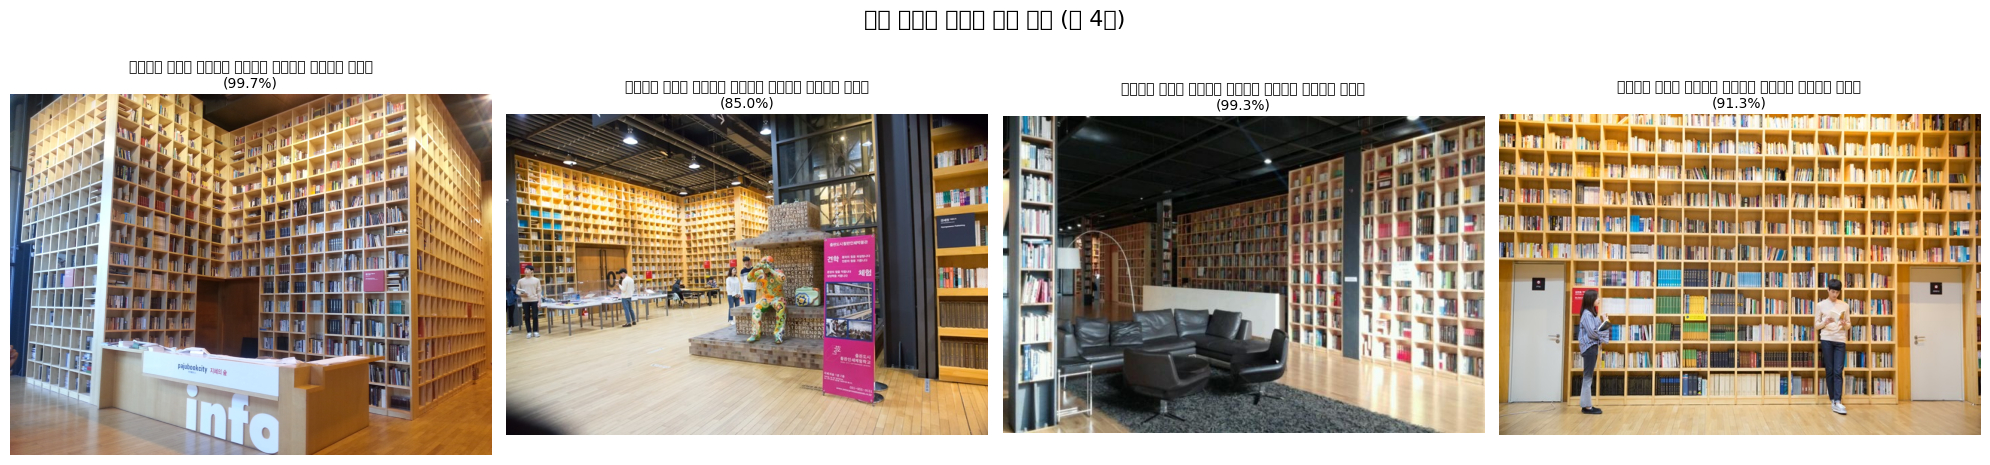


=== 각 이미지별 분위기 확률 분포 ===

(처음 4개 이미지 상세 표시)


📷 [1] 14053057093432.jpg
------------------------------------------------------------
  1. 행복하다 즐겁다 고요하다 편안하다 안락하다 평화롭다 도서관: 99.71% ███████████████████████████████████████
  2. 산업적이고 기계적인               :  0.07% 
  3. 도시적이고 현대적인               :  0.07% 
  4. 바쁘고 활기찬                  :  0.04% 
  5. 지루하고 단조로운                :  0.03% 

📷 [2] 69283d44-9a4f-4c65-8826-f82cfa964d6c.jpg
------------------------------------------------------------
  1. 행복하다 즐겁다 고요하다 편안하다 안락하다 평화롭다 도서관: 85.03% ██████████████████████████████████
  2. 도시적이고 현대적인               :  2.96% █
  3. 생동감 있고 활발한               :  2.68% █
  4. 오락적이고 재미있는               :  1.98% 
  5. 바쁘고 활기찬                  :  1.90% 

📷 [3] 14053057093281.jpg
------------------------------------------------------------
  1. 행복하다 즐겁다 고요하다 편안하다 안락하다 평화롭다 도서관: 99.27% ███████████████████████████████████████
  2. 도시적이고 현대적인               :  0.34% 
  3. 산업적이고 기계적인               :  0.10% 
  4. 아시아적이고 동양적인

In [82]:
# @title
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

image_folder = Path("group5_project/blip/data/지혜의 숲")
image_files = list(image_folder.glob("*.jpg"))  # 모든 jpg 파일

# 한국어 레이블 추출용
korean_labels_only = [label.split(", ")[1] for label in comprehensive_labels]

results = []
all_probs = []  # 각 이미지의 전체 확률 분포 저장

print(f"총 {len(image_files)}개의 이미지 처리 중...\n")

for idx, img_path in enumerate(image_files, 1):
    image = Image.open(img_path)
    inputs = processor(text=comprehensive_labels, images=image,
                      return_tensors="pt", padding=True)

    with torch.no_grad():
        outputs = model(**inputs)
        probs = outputs.logits_per_image.softmax(dim=1)[0]

    all_probs.append(probs.numpy())

    top_idx = probs.argmax()
    results.append({
        'file': img_path.name,
        'mood': korean_labels_only[top_idx],
        'mood_eng': comprehensive_labels[top_idx].split(", ")[0],
        'confidence': probs[top_idx].item() * 100
    })

    # 진행상황 출력
    korean_mood = korean_labels_only[top_idx]
    print(f"[{idx:3d}/{len(image_files)}] {img_path.name:30s} → {korean_mood:25s} ({probs[top_idx]*100:.1f}%)")

# 결과 DataFrame
import pandas as pd
df = pd.DataFrame(results)

# ===== 1. 전체 분위기 분포 출력 =====
print("\n" + "="*60)
print("=== 전체 이미지 분위기 분포 ===")
print("="*60)
mood_counts = df['mood'].value_counts()
print(mood_counts)
print(f"\n총 이미지 수: {len(df)}")

# ===== 2. 모든 이미지 시각화 (격자 형태) =====
n_images = len(image_files)
n_cols = 4  # 한 줄에 4개씩
n_rows = (n_images + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten() if n_images > 1 else [axes]

for idx, (img_path, result) in enumerate(zip(image_files, results)):
    image = Image.open(img_path)
    axes[idx].imshow(image)
    axes[idx].axis('off')

    # 제목에 파일명과 분위기 표시
    title = f"{result['mood']}\n({result['confidence']:.1f}%)"
    axes[idx].set_title(title, fontsize=10, pad=5)

# 빈 subplot 제거
for idx in range(n_images, len(axes)):
    axes[idx].axis('off')

plt.suptitle(f'전체 이미지 분위기 분류 결과 (총 {n_images}장)',
             fontsize=16, y=0.995)
plt.tight_layout()
plt.show()

# ===== 3. 각 이미지별 상세 분위기 분포 =====
print("\n" + "="*60)
print("=== 각 이미지별 분위기 확률 분포 ===")
print("="*60)

# 상위 N개만 출력 (너무 많으면 선택)
n_display = min(20, len(image_files))
print(f"\n(처음 {n_display}개 이미지 상세 표시)\n")

for idx in range(n_display):
    img_name = results[idx]['file']
    probs = all_probs[idx]

    print(f"\n📷 [{idx+1}] {img_name}")
    print("-" * 60)

    # 확률 높은 순으로 정렬
    sorted_indices = np.argsort(probs)[::-1]

    for rank, i in enumerate(sorted_indices[:5], 1):  # Top 5만 표시
        bar = "█" * int(probs[i] * 40)
        print(f"  {rank}. {korean_labels_only[i]:25s}: {probs[i]*100:5.2f}% {bar}")



# 웅진 역사관

In [88]:
# 영어 + 한국어 + 장소 정보 (성능 향상)
comprehensive_labels = [
    # 긍정적 감정 (Positive Emotions)
"happy and joyful and calm and peaceful and relaxed and comfortable and library atmosphere, 행복하다 즐겁다 고요하다 편안하다 안락하다 평화롭다 도서관",
    # "calm and peaceful library atmosphere, 고요하고 평화로운 도서관",
    # "relaxed and comfortable library atmosphere, 편안하고 안락한 도서관",
    # "good and pleasant library atmosphere, 좋고 쾌적한 도서관",

    # 부정적 감정 (Negative Emotions)
    "sad and melancholic, 슬프다 우울하다",
    "gloomy and dark, 어둡다 침울하다",
    "serious and somber, 진지하다 엄숙하다",
    "boring and dull, 지루하다 단조롭다",

    # 에너지/활동성 (Energy/Activity)
    "busy and energetic, 바쁘다 활기차다",
    "lively and vibrant, 생동감있다 활발하다 조각상",

    # 날씨/자연 (Weather/Nature)
    "sunny and bright, 화창하다 밝다",
    "cloudy and overcast, 흐리다 구름꼈다",
    "foggy and misty, 안개꼈다 흐릿하다",
    "cold and chilly, 춥다 쌀쌀하다",

    # 장소/환경 (Place/Environment)
    "urban and modern, 도시적이다 현대적이다",
    "industrial and mechanical, 산업적이다 기계적이다",
    "amusement and entertaining pinocchio, 오락적이다 재미있다 피노키오",

    # 문화적 특성 (Cultural)
    "nostalgic and traditional, 향수있다 전통적이다",
    "asian and oriental, 아시아적이다 동양적이다"
]

In [89]:
# @title
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

image_folder = Path("group5_project/blip/data/지혜의숲 조각상")
image_files = list(image_folder.glob("*.jpg"))  # 모든 jpg 파일

# 한국어 레이블 추출용
korean_labels_only = [label.split(", ")[1] for label in comprehensive_labels]

results = []
all_probs = []  # 각 이미지의 전체 확률 분포 저장

print(f"총 {len(image_files)}개의 이미지 처리 중...\n")

for idx, img_path in enumerate(image_files, 1):
    image = Image.open(img_path)
    inputs = processor(text=comprehensive_labels, images=image,
                      return_tensors="pt", padding=True)

    with torch.no_grad():
        outputs = model(**inputs)
        probs = outputs.logits_per_image.softmax(dim=1)[0]

    all_probs.append(probs.numpy())

    top_idx = probs.argmax()
    results.append({
        'file': img_path.name,
        'mood': korean_labels_only[top_idx],
        'mood_eng': comprehensive_labels[top_idx].split(", ")[0],
        'confidence': probs[top_idx].item() * 100
    })

    # 진행상황 출력
    korean_mood = korean_labels_only[top_idx]
    print(f"[{idx:3d}/{len(image_files)}] {img_path.name:30s} → {korean_mood:25s} ({probs[top_idx]*100:.1f}%)")

# 결과 DataFrame
import pandas as pd
df = pd.DataFrame(results)

# ===== 1. 전체 분위기 분포 출력 =====
print("\n" + "="*60)
print("=== 전체 이미지 분위기 분포 ===")
print("="*60)
mood_counts = df['mood'].value_counts()
print(mood_counts)
print(f"\n총 이미지 수: {len(df)}")

# ===== 2. 모든 이미지 시각화 (격자 형태) =====
n_images = len(image_files)
n_cols = 4  # 한 줄에 4개씩
n_rows = (n_images + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten() if n_images > 1 else [axes]

for idx, (img_path, result) in enumerate(zip(image_files, results)):
    image = Image.open(img_path)
    axes[idx].imshow(image)
    axes[idx].axis('off')

    # 제목에 파일명과 분위기 표시
    title = f"{result['mood']}\n({result['confidence']:.1f}%)"
    axes[idx].set_title(title, fontsize=10, pad=5)

# 빈 subplot 제거
for idx in range(n_images, len(axes)):
    axes[idx].axis('off')

plt.suptitle(f'전체 이미지 분위기 분류 결과 (총 {n_images}장)',
             fontsize=16, y=0.995)
plt.tight_layout()
plt.show()

# ===== 3. 각 이미지별 상세 분위기 분포 =====
print("\n" + "="*60)
print("=== 각 이미지별 분위기 확률 분포 ===")
print("="*60)

# 상위 N개만 출력 (너무 많으면 선택)
n_display = min(20, len(image_files))
print(f"\n(처음 {n_display}개 이미지 상세 표시)\n")

for idx in range(n_display):
    img_name = results[idx]['file']
    probs = all_probs[idx]

    print(f"\n📷 [{idx+1}] {img_name}")
    print("-" * 60)

    # 확률 높은 순으로 정렬
    sorted_indices = np.argsort(probs)[::-1]

    for rank, i in enumerate(sorted_indices[:5], 1):  # Top 5만 표시
        bar = "█" * int(probs[i] * 40)
        print(f"  {rank}. {korean_labels_only[i]:25s}: {probs[i]*100:5.2f}% {bar}")



Output hidden; open in https://colab.research.google.com to view.

# 피노키오

# 라벨링에 '피노키오' 등의 고유명사 추가하면 성능향상

In [91]:
# 영어 + 한국어 + 장소 정보 (성능 향상)
comprehensive_labels = [
    # 긍정적 감정 (Positive Emotions)
"happy and joyful and calm and peaceful and relaxed and comfortable and library atmosphere, 행복하다 즐겁다 고요하다 편안하다 안락하다 평화롭다 도서관",
    # "calm and peaceful library atmosphere, 고요하고 평화로운 도서관",
    # "relaxed and comfortable library atmosphere, 편안하고 안락한 도서관",
    # "good and pleasant library atmosphere, 좋고 쾌적한 도서관",

    # 부정적 감정 (Negative Emotions)
    "sad and melancholic, 슬프다 우울하다",
    "gloomy and dark, 어둡다 침울하다",
    "serious and somber, 진지하다 엄숙하다",
    "boring and dull, 지루하다 단조롭다",

    # 에너지/활동성 (Energy/Activity)
    "busy and energetic, 바쁘다 활기차다",
    "lively and vibrant, 생동감있다 활발하다 조각상",

    # 날씨/자연 (Weather/Nature)
    "sunny and bright, 화창하다 밝다",
    "cloudy and overcast, 흐리다 구름꼈다",
    "foggy and misty, 안개꼈다 흐릿하다",
    "cold and chilly, 춥다 쌀쌀하다",

    # 장소/환경 (Place/Environment)
    "urban and modern, 도시적이다 현대적이다",
    "industrial and mechanical, 산업적이다 기계적이다",
    "amusement and entertaining pinocchio, 오락적이다 재미있다 피노키오",

    # 문화적 특성 (Cultural)
    "nostalgic and traditional, 향수있다 전통적이다",
    "asian and oriental, 아시아적이다 동양적이다"
]

In [92]:
# @title
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

image_folder = Path("group5_project/blip/data/피노키오")
image_files = list(image_folder.glob("*.jpg"))  # 모든 jpg 파일

# 한국어 레이블 추출용
korean_labels_only = [label.split(", ")[1] for label in comprehensive_labels]

results = []
all_probs = []  # 각 이미지의 전체 확률 분포 저장

print(f"총 {len(image_files)}개의 이미지 처리 중...\n")

for idx, img_path in enumerate(image_files, 1):
    image = Image.open(img_path)
    inputs = processor(text=comprehensive_labels, images=image,
                      return_tensors="pt", padding=True)

    with torch.no_grad():
        outputs = model(**inputs)
        probs = outputs.logits_per_image.softmax(dim=1)[0]

    all_probs.append(probs.numpy())

    top_idx = probs.argmax()
    results.append({
        'file': img_path.name,
        'mood': korean_labels_only[top_idx],
        'mood_eng': comprehensive_labels[top_idx].split(", ")[0],
        'confidence': probs[top_idx].item() * 100
    })

    # 진행상황 출력
    korean_mood = korean_labels_only[top_idx]
    print(f"[{idx:3d}/{len(image_files)}] {img_path.name:30s} → {korean_mood:25s} ({probs[top_idx]*100:.1f}%)")

# 결과 DataFrame
import pandas as pd
df = pd.DataFrame(results)

# ===== 1. 전체 분위기 분포 출력 =====
print("\n" + "="*60)
print("=== 전체 이미지 분위기 분포 ===")
print("="*60)
mood_counts = df['mood'].value_counts()
print(mood_counts)
print(f"\n총 이미지 수: {len(df)}")

# ===== 2. 모든 이미지 시각화 (격자 형태) =====
n_images = len(image_files)
n_cols = 4  # 한 줄에 4개씩
n_rows = (n_images + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten() if n_images > 1 else [axes]

for idx, (img_path, result) in enumerate(zip(image_files, results)):
    image = Image.open(img_path)
    axes[idx].imshow(image)
    axes[idx].axis('off')

    # 제목에 파일명과 분위기 표시
    title = f"{result['mood']}\n({result['confidence']:.1f}%)"
    axes[idx].set_title(title, fontsize=10, pad=5)

# 빈 subplot 제거
for idx in range(n_images, len(axes)):
    axes[idx].axis('off')

plt.suptitle(f'전체 이미지 분위기 분류 결과 (총 {n_images}장)',
             fontsize=16, y=0.995)
plt.tight_layout()
plt.show()

# ===== 3. 각 이미지별 상세 분위기 분포 =====
print("\n" + "="*60)
print("=== 각 이미지별 분위기 확률 분포 ===")
print("="*60)

# 상위 N개만 출력 (너무 많으면 선택)
n_display = min(20, len(image_files))
print(f"\n(처음 {n_display}개 이미지 상세 표시)\n")

for idx in range(n_display):
    img_name = results[idx]['file']
    probs = all_probs[idx]

    print(f"\n📷 [{idx+1}] {img_name}")
    print("-" * 60)

    # 확률 높은 순으로 정렬
    sorted_indices = np.argsort(probs)[::-1]

    for rank, i in enumerate(sorted_indices[:5], 1):  # Top 5만 표시
        bar = "█" * int(probs[i] * 40)
        print(f"  {rank}. {korean_labels_only[i]:25s}: {probs[i]*100:5.2f}% {bar}")



Output hidden; open in https://colab.research.google.com to view.

# GIT COMMIT

In [93]:
# 1. Git 사용자 설정
!git config --global user.email "dltkdwns0730@gmail.com"
!git config --global user.name "dltkdwns0730"

In [94]:
# 2. 저장소가 이미 클론되어 있다면
%cd group5_project

/content/group5_project


In [95]:
# 3. 변경사항 확인
!git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [97]:
import shutil
import os

# 1. 노트북 파일을 저장소 안으로 복사
source = "/content/drive/MyDrive/paju/clip_perf_test.ipynb"
destination = "/content/group5_project/clip/clip_perf_test.ipynb"

# notebooks 폴더 생성 (없으면)
os.makedirs("/content/group5_project/clip", exist_ok=True)

# 파일 복사
shutil.copy(source, destination)
print(f"✅ 파일 복사 완료: {destination}")

# 2. Git에 추가
%cd /content/group5_project
!git add notebooks/clip_perf_test.ipynb
!git commit -m "Add: CLIP 성능 테스트 노트북"
!git push

✅ 파일 복사 완료: /content/group5_project/clip/clip_perf_test.ipynb
/content/group5_project
fatal: pathspec 'notebooks/clip_perf_test.ipynb' did not match any files
On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	clip/clip_perf_test.ipynb

nothing added to commit but untracked files present (use "git add" to track)
To https://github.com/iamcmj/group5_project.git
 ! [rejected]        main -> main (fetch first)
error: failed to push some refs to 'https://github.com/iamcmj/group5_project.git'
hint: Updates were rejected because the remote contains work that you do
hint: not have locally. This is usually caused by another repository pushing
hint: to the same ref. You may want to first integrate the remote changes
hint: (e.g., 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.
